# Length

In [36]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
DATA_DIR = '../data/Data_For_Analysis/'

# Experiment Config
DF_NAME = 'MathQA'
DIFFICULTY = 'easy'
NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
file_path = os.path.join(DATA_DIR, f'{DF_NAME}_{DIFFICULTY}_CS.csv')

In [37]:
df = pd.read_csv(file_path)

# Visualize

In [38]:
df

,length,instruction violation,internal mistake,correctness
0,4,0,0,1
1,4,0,0,1
2,4,0,0,1
3,4,0,0,1
4,4,0,0,1
...,...,...,...,...
19995,5,0,0,0
19996,5,0,0,1
19997,5,0,0,0
19998,4,0,0,1


In [41]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            values = df[column][i]
            
            # Concatenate the values into a single string
            concatenated_values += values
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    concatenated_data[outcome_column] = df[outcome_column]
    
    # Create a DataFrame from the concatenated data dictionary
    df_final = pd.DataFrame(concatenated_data)
    
    return df_final

Optimization terminated successfully.
         Current function value: 0.686779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            correctness   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19996
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                0.008959
Time:                        17:07:54   Log-Likelihood:                -13736.
converged:                       True   LL-Null:                       -13860.
Covariance Type:            nonrobust   LLR p-value:                 1.498e-53
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4446      0.036     12.291      0.000       0.374       0.

/var/folders/bm/2x1k2y0s2bv2xxbw4jxfs_hh0000gn/T/ipykernel_70649/2243654122.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, coef_df['Coefficient'][i]+0.02, '***', ha='center')


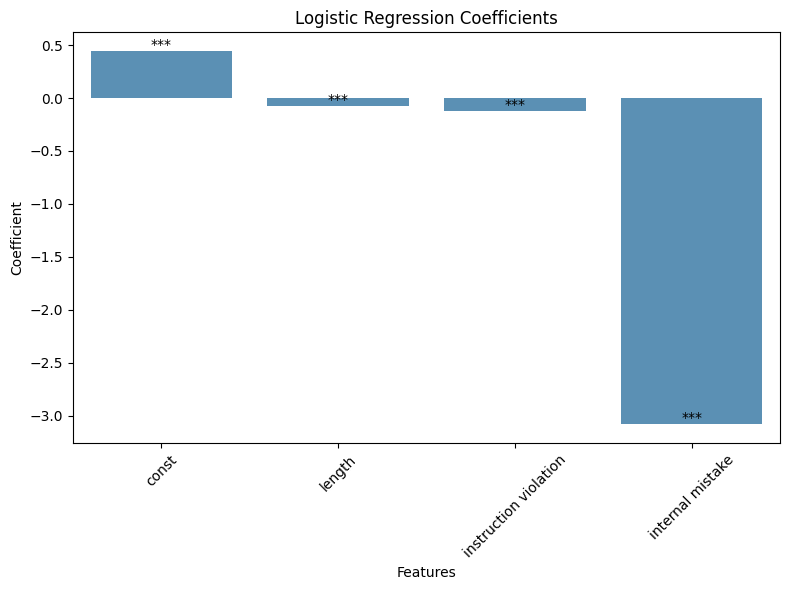

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# Separate the features (X) and the outcome variable (y)
X = df[['length', 'instruction violation', 'internal mistake']]
y = df['correctness']

# Add a constant term to the features for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary to see the coefficients and their significance
print(model.summary())

# Extract the coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame to store the coefficients and p-values
coef_df = pd.DataFrame({'Coefficient': coefficients, 'P-value': p_values})

# Visualize the coefficients and their significance using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)

for i, p_value in enumerate(coef_df['P-value']):
    if p_value < 0.001:
        plt.text(i, coef_df['Coefficient'][i]+0.02, '***', ha='center')
    elif p_value < 0.01:
        plt.text(i, coef_df['Coefficient'][i]+0.02, '**', ha='center')
    elif p_value < 0.05:
        plt.text(i, coef_df['Coefficient'][i]+0.02, '*', ha='center')

plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.686779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            correctness   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19996
Method:                           MLE   Df Model:                            3
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                0.008959
Time:                        17:11:43   Log-Likelihood:                -13736.
converged:                       True   LL-Null:                       -13860.
Covariance Type:            nonrobust   LLR p-value:                 1.498e-53
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4446      0.036     12.291      0.000       0.374       0.

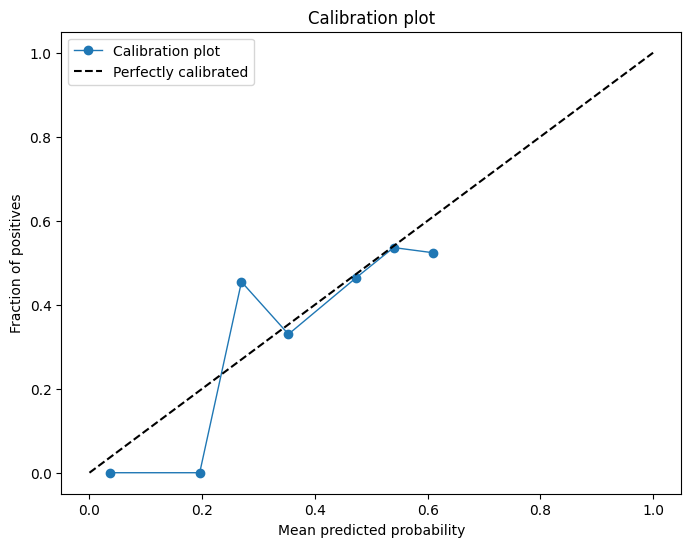

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assume you have a DataFrame called 'df' with the columns:
# 'length', 'instruction', 'violation', 'internal', 'mistake', 'correctness'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ordinal logistic regression model on the training data
model = sm.Logit(y, X)
result = model.fit()

# Print the model summary
print(result.summary())


# Make predictions on the test data (predicting probabilities)
y_pred_proba = result.predict(sm.add_constant(X_test))

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Calibration plot
# Obtain the fraction of positives and mean predicted probabilities in bins
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

# Create the calibration plot
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.570


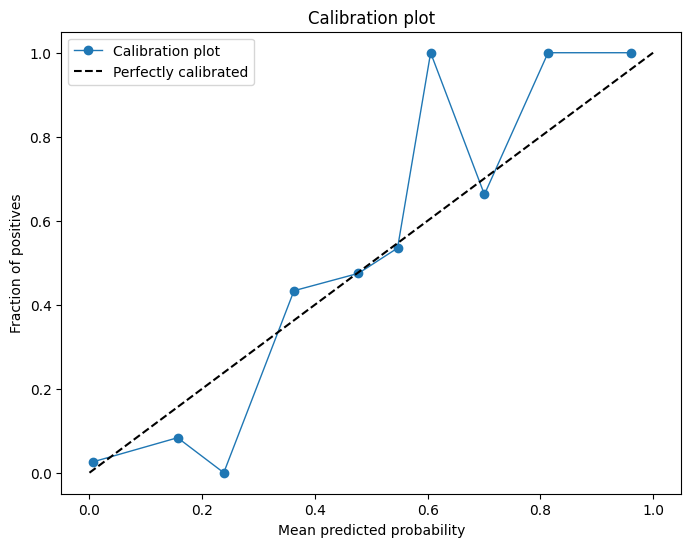

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assume you have a DataFrame called 'df' with the columns:
# 'length', 'instruction', 'violation', 'internal', 'mistake', 'correctness'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc:.3f}")

# Calibration plot
# Obtain the fraction of positives and mean predicted probabilities in bins
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)

# Create the calibration plot
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.5697880446141862
The Brier score is: 0.24361710893587338
Log Loss is: 0.6785580297452801


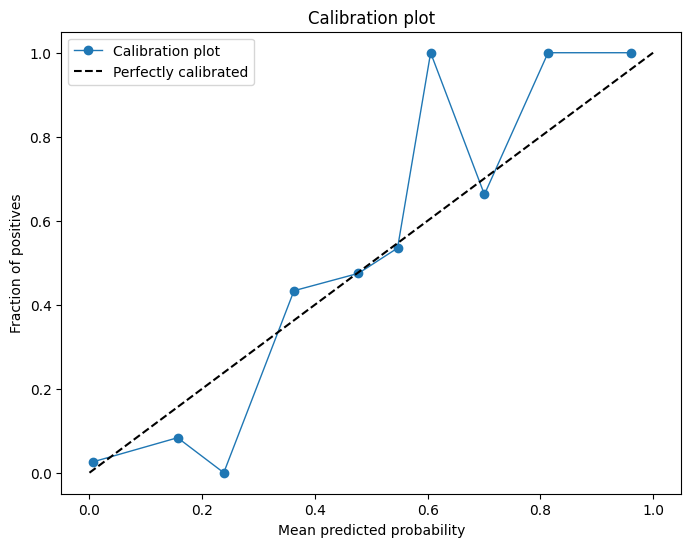

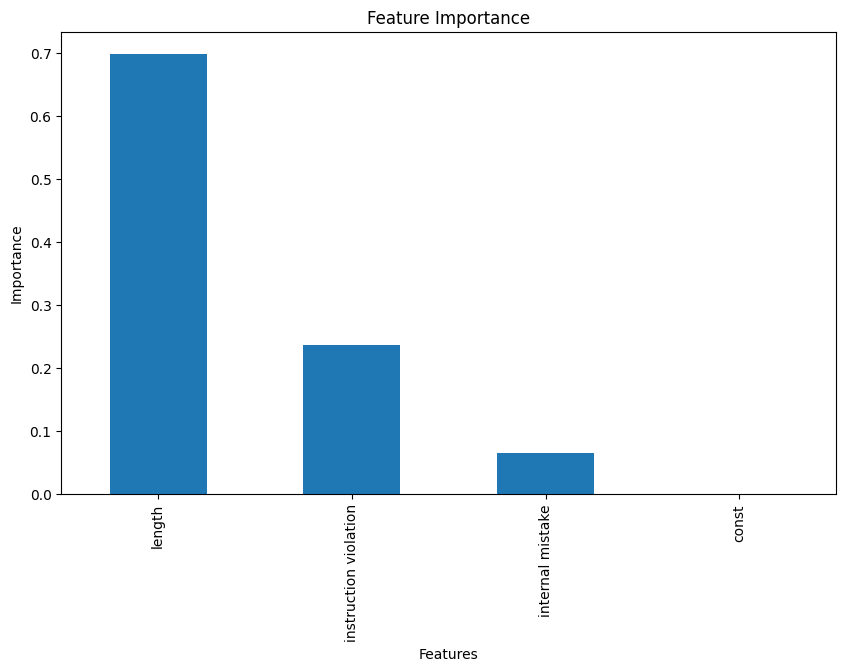

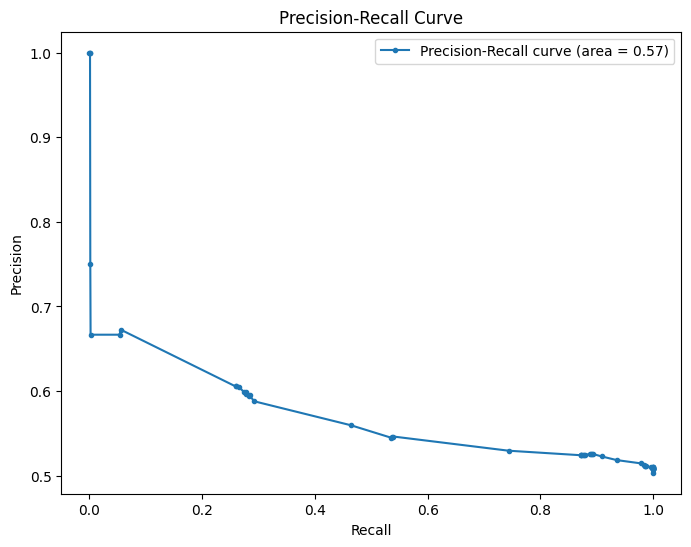

In [56]:
# Split the data into training and test sets
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# TODO: 1: Check consistency on the CoT answers and correct answers
#       2: Try an ordinal logistic regression model to predict the correctness of the CoT answers and measure the importance of the features
#       3: Try binary logistic regression model to predict the correctness of the CoT answers and measure the importance of the features if the ordinal logistic regression model does not work(assumption violated)
#       4: Build a scoring function (LR/RF) to predict a confidence score for each CoT answer, and then use the correct binary outcome to verify the corretness of confidence score. (AUROC,calibration plot)